In [ ]:
!jupyter nbconvert arm.slides.ipynb --to slides --post serve

[NbConvertApp] Converting notebook arm.slides.ipynb to slides
[NbConvertApp] Writing 345784 bytes to arm.slides.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/arm.slides.slides.html
Use Control-C to stop this server


# SIMD + ARM

# А теперь прям совсем жесть: числа с плавающей точкой

## Есть отдельный чип (уже нет)

- `FPU` aka **F**loating point **P**rocessing **U**nit

- есть "старые" регистры размером в 80bit, но мы про них не будем говорить

- есть **SSE** (**S**treaming **S**IMD **E**xtensions) и у него свои регистры

- `xmm0`, `xmm1`, ... `xmm15` размером 128bit

- `ymm0`, `ymm1`, ... `ymm15` - 256bit

- `zmm0`, `zmm1`, ... `zmm15` - 512bit

- регистры тоже вложены друг в друга (`xmmN` в `ymmN` в `zmmN`)

Все примеры будут про `xmmN`. Работа с `ymmN` аналогична

## Just floats

- была команда `mov`

- к ней добавили суффикс `s` (single) - т.к. работаем с одним числом

- и дальше добавляем либо `s` (снова single - aka float), либо `d` (double)

```asm
// используем только младшие 32bit регистра
   movss DST, SRC
// |  |`- Single - aka float
// |   `- Single - работаем с одним числом
// `----- mov    - операнд

// используем только младшие 64bit регистра
   movsd DST, SRC
// |  |`- Double - aka double
// |   `- Single - работаем с одним числом
// `----- mov    - операнд
```

## Арифметические операции

Логика та же `s` для `float` и `d` для `double`

```asm
addsd   DST, SRC   // DST += SRC, double
addss   DST, SRC   // DST += SRC, float
subsd   DST, SRC   // DST -= SRC, double
subss   DST, SRC   // DST -= SRC, float
mulsd   DST, SRC   // DST *= SRC, double
mulss   DST, SRC   // DST *= SRC, float
divsd   DST, SRC   // DST /= SRC, double
divss   DST, SRC   // DST /= SRC, float
sqrtsd  DST, SRC   // DST = sqrt(SRC), double
sqrtss  DST, SRC   // DST = sqrt(SRC), float
maxsd   DST, SRC   // DST = max(DST, SRC), double
maxss   DST, SRC   // DST = max(DST, SRC), float
minsd   DST, SRC   // DST = min(DST, SRC), double
minss   DST, SRC   // DST = min(DST, SRC), float
```

Пример, как конвертить в `int` и обратно (для `float` аналогично, но с `s`)

```asm
cvtsd2si DST, SRC  // double -> int
cvtsi2sd DST, SRC  // int -> double
```

Отдельно про сравнения

```asm
comisd  DST, SRC  // для double
comiss  DST, SRC  // для float
```

## SIMD

`xmm0` - 128bit

`sizeof(float) = 32bit`

`sizeof(double) = 64bit`

значит в `xmm0` влезет несколько))

и с ними можно работать параллельно (`packed`)

Загрузка и выгрузка

```asm
mov[ap|up][s|d] DST, SRC
```

- выравнивание по 16bit
    - `ap` - `Aligned Packed`
    - `up` - `Unaligned Packed` (выравнивания нет)
- `float` / `double`
    - `s` - `Single` aka `float`
    - `d` - `Double` aka `double`

В общем виде команды выглядят так

```asm
OPERATION[p][s|d]
```
- `p` - `Packed`
- `float` / `double`
    - `s` - `Single` aka `float`
    - `d` - `Double` aka `double`

Ну т.е. `mulpd xmm0, xmm1` - это мы попарно перемножаем `double`-ы в `xmm0` и `xmm1` и сохраняем результат в `xmm0`

### Horizontal add

Окей... А что если я хочу 2 `double` (4 `float`) сложить внутри одного регистра?

Ну как минимум есть `hadd[p][s|d]` - aka `Horizontal ADD Packed` и дальше `float` / `double`.
Вот так будет выглядеть `haddps xmm0, xmm1`

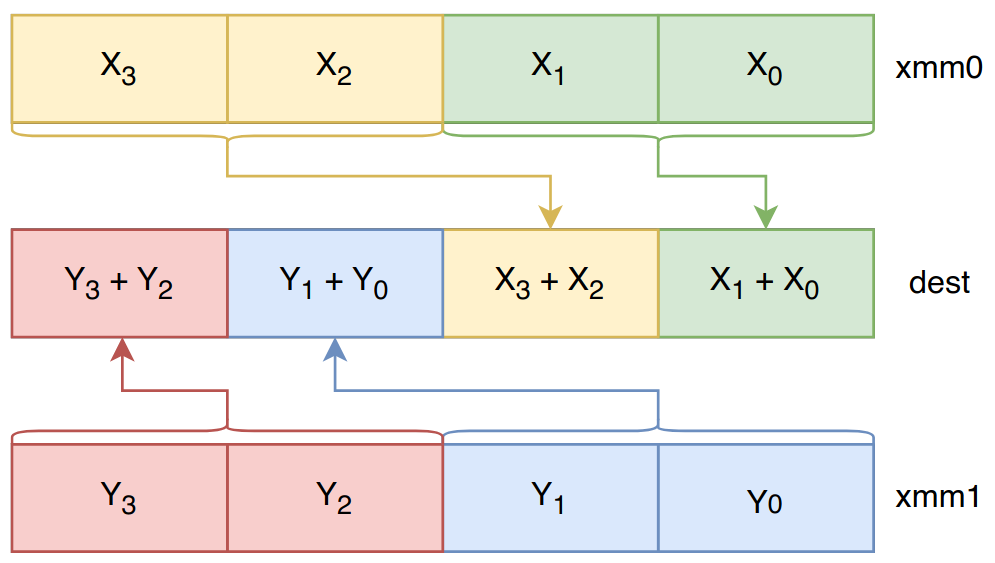

Команду можно применять саму на себя - `haddps xmm0, xmm0` будет валидной командой.

# ARM

Тут так получилось, что ассемблеры примерно одинаковы

И на лекции правда рассказали всё, что нужно знать

Я расписал страничку с отличиями (на всякий)

Поэтому сейчас разберем **ТОЛЬКО** как тестить **arm** на **x86_64**

## Cross Compilation

## QEMU

Подробнее - на страничке в доках

# Почему надо быть аккуратнее с scanf

# Grazie!